<a href="https://colab.research.google.com/github/maximblaze/CP2020/blob/master/Sun_Earth_Moon_Doronkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Моделирование движения системы Солнце-Земля-Луна с помощью численного интегрирование системы дифференциальных уравнений движения. Подготовил: студент факультета физики НИУ ВШЭ Доронькин Максим Вячеславович

Сперва определимся с начальными условиями и гравитационными параметрами тел. Начнем с определения неизменных (в нашем приближении) во времени параметрах, то есть определения констант, масс, и гравитационных параметров , которые равняются в астрономии : $$mu = GM$$, а затем нормируем эти параметры на Солнечные (как самого большого тела): $$kappa = mu / mu(sol) $$

In [21]:
import numpy as np

#
# Исходные данные задачи
#

# Гравитационная постоянная
G = 6.67e-11

# Массы тел (Луна, Земля, Солнце)
m = [7.349e22, 5.792e24, 1.989e30]

# Расчитываем гравитационные параметры тел
mu = []

print("Гравитационные параметры тел")

for i, mass in enumerate(m):
    mu.append(G * mass)
    print("mu[" + str(i) + "] = " + str(mu[i]))

# Нормируем гравитационные параметры к Солнцу
kappa = []

print("Нормированные гравитационные параметры")

for i, gp in enumerate(mu):
    kappa.append(gp / mu[-1])
    print("xi[" + str(i) + "] = " + str(kappa[i]))

print("\n")

# Астрономическая единица
a = 1.495978707e11

Гравитационные параметры тел
mu[0] = 4901783000000.0
mu[1] = 386326400000000.0
mu[2] = 1.326663e+20
Нормированные гравитационные параметры
xi[0] = 3.6948215183509304e-08
xi[1] = 2.912016088486677e-06
xi[2] = 1.0




Теперь введём безразмерное время, нормировав единицы на единицы системы Солнце-Земля, а также загрузим с сайта NASA координаты и скорости Земли и Луны из эфемирид Земли и Луны относительно барицентра Солнечной системы. 
В качестве начальной точки возьмём день ближайшего Солнечного затмения, 21 июня 2020 года! (как раз очень скоро! Да и по нашему условию подойдет, ведь три тела выстроятся на одной линии (в приближении)

https://ssd.jpl.nasa.gov/horizons.cgi#results - отсюда взяли координаты и скорости Луны и Земли



In [22]:
# Масштаб безразмерного времени, c
T = 2 * np.pi * a * np.sqrt(a / mu[-1])

print("Масштаб времени T = " + str(T) + "\n")

# Вводим константы для вычисления безразмерных скоростей
Td = 86400.0
u = np.sqrt(mu[-1] / a) / 2 / np.pi






# Координаты NASA для Луны

xL = -8.347919466463547E-03
yL = -1.006754793574750E+00
zL = 9.990837700281036E-05

xi_10 = np.array([xL, yL, zL])

print("Начальное положение Луны, а.е.: " + str(xi_10))

# Координаты NASA для Земли

xE = -8.507983270876264E-03
yE = -1.009350395115207E+00
zE = 1.099616387149111E-04

xi_20 = np.array([xE, yE, zE])


print("Начальное положение Земли, а.е.: " + str(xi_20))

# Начальная скорость Луны
vxL = 1.633922122378138E-02
vyL = -1.136453088011751E-04
vzL = 5.351804905004730E-05

vL0 = np.array([vxL, vyL, vzL])
uL0 = np.array([0.0, 0.0, 0.0])

for i, v in enumerate(vL0):
    vL0[i] = v * a / Td
    uL0[i] = vL0[i] / u

print("Начальная скорость Луны, м/с: " + str(vL0))
print(" -//- безразмерная: " + str(uL0))

# Начальная скорость Земли
vxE = 1.692317951162722E-02
vyE = -1.241578574296244E-04
vzE = -4.559334600220198E-07

vE0 = np.array([vxE, vyE, vzE])
uE0 = np.array([0.0, 0.0, 0.0])

for i, v in enumerate(vE0):
    vE0[i] = v * a / Td
    uE0[i] = vE0[i] / u

print("Начальная скорость Земли, м/с: " + str(vE0))
print(" -//- безразмерная: " + str(uE0))

Масштаб времени T = 31563683.35432583

Начальное положение Луны, а.е.: [-8.34791947e-03 -1.00675479e+00  9.99083770e-05]
Начальное положение Земли, а.е.: [-8.50798327e-03 -1.00935040e+00  1.09961639e-04]
Начальная скорость Луны, м/с: [28290.65629599  -196.77194689    92.66419192]
 -//- безразмерная: [ 5.96905098 -0.04151695  0.01955124]
Начальная скорость Земли, м/с: [ 2.93017549e+04 -2.14973971e+02 -7.89429106e-01]
 -//- безразмерная: [ 6.18238286e+00 -4.53573993e-02 -1.66561798e-04]


А теперь рассчитаем положение Солнца относительно барицентра системы, воспользовавшись уравнением на барицентр 
$$m_1*r_1 + m_2*r_2 + m_3*r_3 = 0 $$
,отнормировав массы на массу Солнца.

In [23]:
# Расчитываем начальное положение Солнца, полагая что начало координат - в центре масс всей системы

xi_30 = - kappa[0] * xi_10 - kappa[1] * xi_20

print("Начальное положение Солнца, а.е.: " + str(xi_30))


print("\n")
# Начальная скорость Солнца
vS0 = - kappa[0] * vL0 - kappa[1] * vE0
uS0 = - kappa[0] * uL0 - kappa[1] * uE0

print("Начальная скорость Солнца, м/с: " + str(vS0))
print(" -//- безразмерная: " + str(uS0))

Начальное положение Солнца, а.е.: [ 2.50838249e-08  2.97644238e-06 -3.23901497e-10]


Начальная скорость Солнца, м/с: [-8.63724708e-02  6.33278035e-04 -1.12494624e-06]
 -//- безразмерная: [-1.82237441e-05  1.33615454e-07 -2.37352623e-10]


А теперь уже займемся окончательной предобработкой данных. Для того чтобы подставлять нашу систему уравнений в блок, который нам её решит, необходимо получить ускорения трёх тел. Получим мы их прямым дифференцированием с учетом безразмерного времени. А ускорение Солнца просто получим из уравнения на барицентр системы: 
$$m_1*r_1 + m_2*r_2 + m_3*r_3 = 0 $$

In [24]:
def calcAccels(xi):
    k = 4 * np.pi ** 2

    xi12 = xi[1] - xi[0]
    xi13 = xi[2] - xi[0]
    xi23 = xi[2] - xi[1]

    s12 = np.sqrt(np.dot(xi12, xi12))
    s13 = np.sqrt(np.dot(xi13, xi13))
    s23 = np.sqrt(np.dot(xi23, xi23))

    a1 = (k * kappa[1] / s12 ** 3) * xi12 + (k * kappa[2] / s13 ** 3) * xi13
    a2 = -(k * kappa[0] / s12 ** 3) * xi12 + (k * kappa[2] / s23 ** 3) * xi23
    a3 = -(k * kappa[0] / s13 ** 3) * xi13 - (k * kappa[1] / s23 ** 3) * xi23

    return [a1, a2, a3]

Теперь окончательно приведем нашу систему к очень простому виду, к нормальной форме Коши  $$dy/dtau = f (tau, y) $$ , где y будет для каждого из трех тел являться вектором из 6 переменных, координат и скоростей Земли, Солнца и Луны

In [25]:
#
#   Система уравнений в нормальной форме Коши
#
def f(t, y):
    n = 9

    dydt = np.zeros((2 * n))

    for i in range(0, n):
        dydt[i] = y[i + n]

    xi1 = np.array(y[0:3])
    xi2 = np.array(y[3:6])
    xi3 = np.array(y[6:9])

    accels = calcAccels([xi1, xi2, xi3])

    i = n
    for accel in accels:
        for a in accel:
            dydt[i] = a
            i = i + 1

    return dydt



Выведем начальные условия:

In [26]:
# Начальные условия задачи Коши
y0 = [xi_10[0], xi_10[1], xi_10[2],
      xi_20[0], xi_20[1], xi_20[2],
      xi_30[0], xi_30[1], xi_30[2],
      uL0[0], uL0[1], uL0[2],
      uE0[0], uE0[1], uE0[2],
      uS0[0], uS0[1], uS0[2]]



Наконец произведем численное интегрирование, с помощью модуля scipy.integrate.ode из scipy.integrate, параметры для него подобрать несложно : 'vode' - так как у нас все значения действительны, nsteps, maxsteps и rtol подбираются интуитивно, самое интересное это метод, от которого кстати тоже зависит vode. Итак, метод для решения этого диффура - BDF (backward differenciation formula)
Так как наша система жесткая (собственные числа матрицы могут быть большими), то лучше не применять явные методы, поэтому будем решать неявным. BDF это обобщение неявного метода Эйлера. Метод Эйлера считает каждую следующую точку зависящей от предыдущей, а BDF рассматривает сразу семейство предыдущих точек (не больше 5, после уже решение нестабильно). 
Более подробно: https://en.wikipedia.org/wiki/Backward_differentiation_formula


Ну и выберем промежуток времени, в течение которого мы хотим рассмотреть движение НТ.


In [27]:
# Начальное время
t_begin = 0
# Конечное время
t_end = 30 * Td / T
# Интересующее нас число точек траектории
N_plots = 1000
# Шаг времени между точкими
step = (t_end - t_begin) / N_plots

import scipy.integrate as spi

solver = spi.ode(f)

solver.set_integrator('vode', nsteps=50000, method='bdf', max_step=1e-5, rtol=1e-12)
solver.set_initial_value(y0, t_begin)

ts = []
ys = []
i = 0
points = []
while solver.successful() and solver.t <= t_end:
    solver.integrate(solver.t + step)
    ts.append(solver.t)
    ys.append(solver.y)
    if solver.y[0] == solver.y[3] and solver.y[1] == solver.y[4]:
        points.append(solver.y)
    #print(ts[0], ys[0])
    i = i + 1

t = np.vstack(ts)

xi1_x, xi1_y, xi1_z, \
xi2_x, xi2_y, xi2_z, \
xi3_x, xi3_y, xi3_z, \
u1_x, u1_y, u1_z, \
u2_x, u2_y, u2_z, \
u3_x, u3_y, u3_z = np.vstack(ys).T



Построим сначала график, на котором можно увидеть траектории всех трех НТ за период, который мы выбрали в предыдущем пункте:


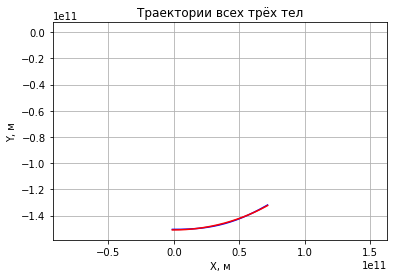

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.plot((xi1_x) * a, (xi1_y) * a, color='blue')
ax.plot((xi2_x) * a, (xi2_y) * a, color='red')
ax.plot((xi3_x) * a , (xi3_y) * a, color='yellow')

ax.axis('equal')
ax.set_xlabel('X, м')


#более детально рассмотрим наш график, чтобы увидеть на нём движение всех тел, 
#и доказать что мы действительно нарисовали все три траектории


#ax.set_xlim(-5e+5, 5e+5) #+5 - Солнце
#ax.set_ylim(-5e+5, 5e+5) #+5 - Солнце


#ax.set_xlim(0e+11, 0.5e+11) #+5 - Луна
#ax.set_ylim(-1.6e11, -1.4e+11) #+5 - Луна


ax.set_ylabel('Y, м')
ax.grid(True)
ax.set_title('Траектории всех трёх тел')

plt.show()

А тут рассмотрим конкретно движение Луны вокруг Земли, чтобы заметить, какое влияние оказывает на орбиту Луны Солнце. Как можно видеть, орбита смещена и это обусловлено, скорее всего, именно влиянием третьего, возбуждающего тела, то есть Солнца.

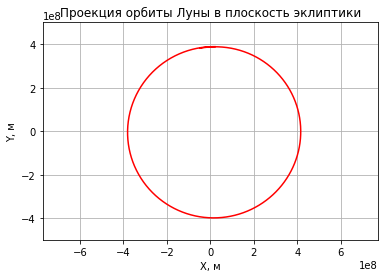

In [29]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='rectilinear')
ax2.plot((xi1_x - xi2_x) * a, (xi1_y - xi2_y) * a, color='red')
ax2.axis('equal')
ax2.set_xlim(-5e8, 5e8)
ax2.set_xlabel('X, м')
ax2.set_ylim(-5e8, 5e8)
ax2.set_ylabel('Y, м')
ax2.grid(True)
ax2.set_title('Проекция орбиты Луны в плоскость эклиптики')

plt.show()